Importing libraries

In [ ]:
#introducing libraries
!pip install numpy scipy pandas>1.0 matplotlib lmfit colour

In [ ]:
#calling up libraries
from datetime import datetime
import pandas as pd
import numpy as np
import scipy
from scipy import optimize
import scipy.integrate as integrate
from scipy.integrate import quad
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from mpl_toolkits import mplot3d
from datetime import timedelta
from lmfit.models import LorentzianModel
import statistics
from matplotlib.collections import LineCollection 
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter

Importing data from google drive folder, sorting each into absorbance, spectroscope runs, and general spectroscope data.

In [ ]:
#import CSV data from drive
from google.colab import drive
import glob
import os
drive.mount('drive', force_remount=True)
folder = "/content/drive/MyDrive/PBDBT:ITIC Cells"
all_files = glob.glob(os.path.join(folder, '*.csv'))
Spec_data = {}
Sorb_data = {}
Irr_data = {}
titles = []



for filename in all_files:
  #Simplify name
  new_name = filename.replace(".csv", "").replace("/content/drive/MyDrive/PBDBT:ITIC Cells/","")
  #import data
  df = pd.read_csv(filename, sep=',', header=0)
  #Some cleaning
  df.drop(df.tail(14).index, inplace=True)
  df = df.rename({'0.000000000.1':'0.000000000'}, axis=1)
  cols = df.columns.values
  cols[0] = 'Wavelength(nm)'
  df.columns = cols
  df = df.set_index('Wavelength(nm)')
  #remove rows (wavelengths) with at least 3 na values
  df = df.dropna(axis=0, thresh=3)

  #change strings to numbers
  df.index = pd.to_numeric(df.index, errors='ignore')
  df.columns = np.around(pd.to_numeric(df.columns, errors='ignore'), 3).astype(float)

  titles.append(new_name)
  Spec_data[new_name] = df

Spec_data








Mounted at drive


{'01 CB blend 1mW magic angle -5--4000ps':                 -5.000     -4.751     ...   3281.786   4000.002
 Wavelength(nm)                        ...                      
 752.979905            NaN   0.000976  ...   0.001891   0.001031
 756.394603       0.000479  -0.006142  ...   0.000204   0.001393
 759.809699       0.000609  -0.000244  ...   0.002145   0.002053
 763.225193       0.000746  -0.001212  ...  -0.000105  -0.000084
 766.641085      -0.000616  -0.000948  ...   0.000631   0.002811
 ...                   ...        ...  ...        ...        ...
 1608.497301      0.000638   0.000075  ...  -0.000041   0.001683
 1612.010267      0.000527   0.001195  ...  -0.000516   0.002880
 1615.523631      0.000445   0.000852  ...   0.000186   0.000637
 1619.037392      0.000224  -0.000009  ...  -0.000057   0.000659
 1622.551552      0.000190   0.000093  ...   0.000440   0.000558
 
 [252 rows x 75 columns],
 '01 UvVis magi angle 0.8mW 532nm':                 -5.000     -4.751     ...   6522.

# Clean-up methods

1. Remove background

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


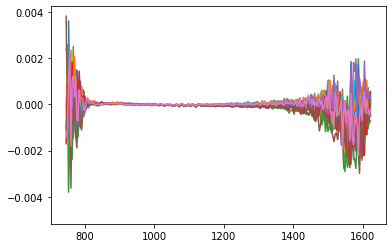

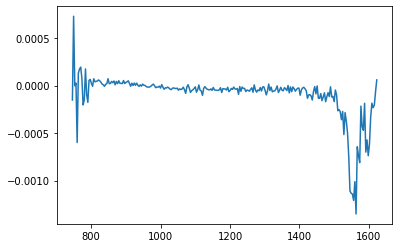

                    -5.0    -4.751      -4.5  ...    -1.252      -1.0      mean
Wavelength(nm)                                ...                              
746.151702      0.000794  0.002348  0.000806  ... -0.001025 -0.001397 -0.000153
749.565604           NaN  0.002610       NaN  ... -0.000462 -0.001106  0.000729
752.979905     -0.000260 -0.001369 -0.001275  ... -0.000688  0.001025 -0.000002
756.394603     -0.001747  0.001029 -0.001474  ...  0.002261  0.002286  0.000025
759.809699     -0.001738 -0.001390  0.002066  ... -0.003626 -0.001824 -0.000600
...                  ...       ...       ...  ...       ...       ...       ...
1608.497301    -0.001316 -0.000536  0.000573  ... -0.000396 -0.000366 -0.000186
1612.010267    -0.000787  0.000166  0.000338  ... -0.001010  0.000209 -0.000234
1615.523631    -0.000240 -0.000078  0.000076  ... -0.000485 -0.000225 -0.000205
1619.037392     0.000113  0.000013  0.000490  ... -0.000676 -0.000474 -0.000063
1622.551552    -0.000266  0.000124  0.00

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


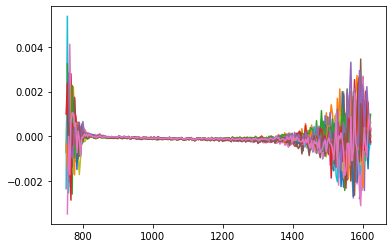

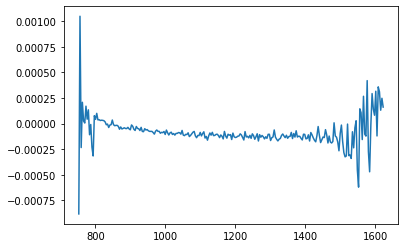

                  -5.001    -4.749      -4.5  ...    -1.249      -1.0      mean
Wavelength(nm)                                ...                              
752.979905     -0.002377       NaN -0.000707  ... -0.000541       NaN -0.000882
756.394603           NaN       NaN  0.002256  ...       NaN -0.003458  0.001050
759.809699      0.000234  0.000977       NaN  ...  0.000594  0.000004 -0.000234
763.225193     -0.000642  0.000537 -0.000424  ... -0.000950 -0.001715  0.000209
766.641085      0.000566  0.001591  0.000088  ... -0.000516  0.000661  0.000026
...                  ...       ...       ...  ...       ...       ...       ...
1608.497301    -0.000585  0.000530 -0.001075  ...  0.000222 -0.000500  0.000359
1612.010267    -0.000365  0.001637  0.000211  ...  0.000068 -0.000938  0.000311
1615.523631    -0.001442  0.000558 -0.000109  ... -0.000296  0.000340  0.000131
1619.037392     0.000082  0.000794  0.000160  ...  0.000211  0.000942  0.000248
1622.551552    -0.000338  0.000251  0.00

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


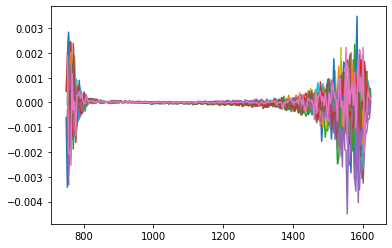

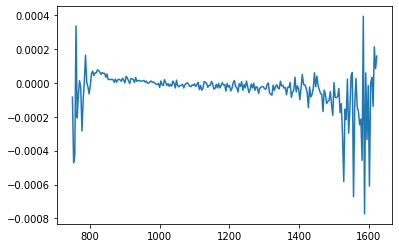

                    -5.0    -4.751    -4.501  ...    -1.249      -1.0      mean
Wavelength(nm)                                ...                              
746.151702           NaN       NaN       NaN  ...       NaN       NaN       NaN
749.565604           NaN       NaN       NaN  ...       NaN       NaN -0.000085
752.979905      0.000825 -0.000752 -0.001209  ... -0.001438  0.001899 -0.000471
756.394603     -0.002336  0.000858  0.000012  ... -0.000142 -0.002059 -0.000428
759.809699      0.002465 -0.002463  0.000344  ...  0.000537 -0.001981  0.000335
...                  ...       ...       ...  ...       ...       ...       ...
1608.497301    -0.000578  0.000169 -0.000075  ... -0.000711 -0.000580  0.000031
1612.010267    -0.000861 -0.000360  0.000359  ...  0.000330 -0.000336 -0.000140
1615.523631    -0.000036 -0.000490  0.000288  ...  0.000296  0.000495  0.000212
1619.037392    -0.000235  0.000584 -0.000092  ...  0.000136  0.000245  0.000083
1622.551552    -0.000072  0.000124 -0.00

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


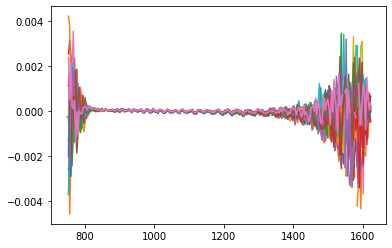

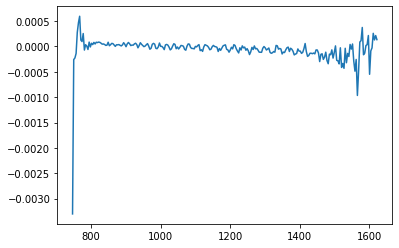

                        -5.0    -4.751    -4.501  ...    -1.249      -1.0      mean
Wavelength(nm)                                    ...                              
746.151702               NaN       NaN       NaN  ...       NaN       NaN -0.003301
749.565604               NaN       NaN       NaN  ...       NaN       NaN -0.000259
752.979905     -1.313011e-03  0.000179 -0.000541  ... -0.000504  0.002371 -0.000228
756.394603      5.843360e-04 -0.004559  0.000806  ...       NaN  0.000496 -0.000139
759.809699     -3.309750e-04 -0.001927  0.001333  ...  0.001130  0.002149  0.000277
...                      ...       ...       ...  ...       ...       ...       ...
1608.497301    -7.008500e-05 -0.001995  0.001432  ... -0.000806 -0.000821 -0.000029
1612.010267    -9.760000e-07 -0.000354  0.000954  ...  0.000196  0.001499  0.000258
1615.523631     1.393960e-04 -0.001225  0.000126  ... -0.000282  0.000572  0.000128
1619.037392    -6.764500e-05  0.000175  0.000382  ...  0.000062  0.000034  0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


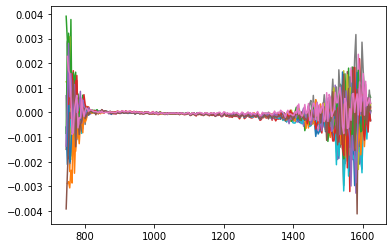

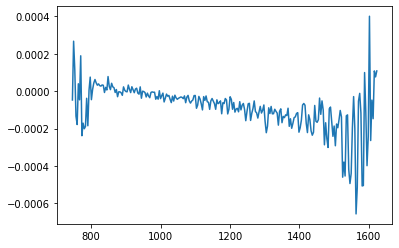

                  -5.003    -4.749      -4.5  ...    -1.249      -1.0      mean
Wavelength(nm)                                ...                              
746.151702      0.001076 -0.003417  0.003906  ... -0.003912       NaN -0.000047
749.565604           NaN       NaN  0.002920  ... -0.002516  0.002276  0.000268
752.979905      0.000427  0.000302 -0.001189  ... -0.001281  0.001710  0.000115
756.394603     -0.000609 -0.002400 -0.000159  ... -0.000011  0.001581 -0.000134
759.809699     -0.001394 -0.000601  0.003774  ... -0.000231  0.000677 -0.000178
...                  ...       ...       ...  ...       ...       ...       ...
1608.497301     0.000202 -0.000376 -0.000794  ...  0.000200  0.001267 -0.000047
1612.010267     0.000217 -0.000032  0.000528  ... -0.000489  0.000287 -0.000147
1615.523631    -0.000388 -0.000158  0.000379  ...  0.000589  0.000379  0.000109
1619.037392    -0.000302 -0.000186  0.000737  ...  0.000069  0.000587  0.000077
1622.551552     0.000055  0.000083  0.00

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


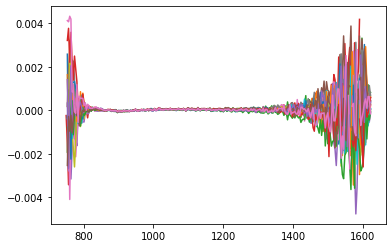

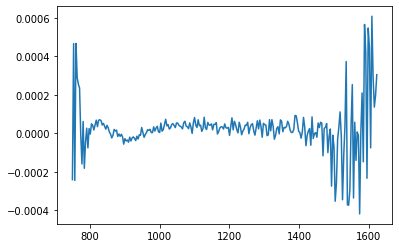

                    -5.0    -4.751    -4.501  ...    -1.249    -1.001      mean
Wavelength(nm)                                ...                              
749.565604           NaN       NaN       NaN  ...       NaN       NaN -0.000240
752.979905      0.002581  0.001633 -0.001919  ... -0.002531  0.004126  0.000467
756.394603     -0.002595 -0.000722  0.001520  ... -0.000280  0.004070 -0.000244
759.809699      0.000207 -0.000178  0.000516  ... -0.000958  0.004326  0.000468
763.225193     -0.000725 -0.001181  0.000616  ... -0.000226  0.004193  0.000290
...                  ...       ...       ...  ...       ...       ...       ...
1608.497301     0.000181 -0.001480  0.001056  ...  0.001967  0.000527  0.000609
1612.010267     0.000366 -0.000047  0.000803  ...  0.000923  0.000097  0.000292
1615.523631    -0.000253 -0.000273  0.001178  ...  0.000491  0.000641  0.000137
1619.037392    -0.000205 -0.000403  0.000734  ...  0.000159  0.000625  0.000197
1622.551552     0.000431  0.000240  0.00

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


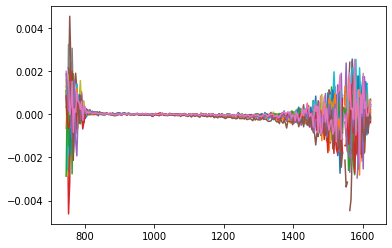

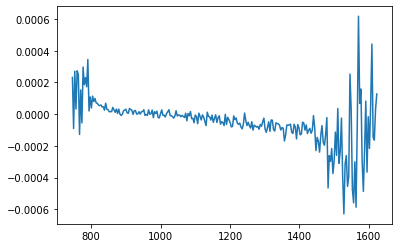

                    -5.0    -4.751    -4.501  ...    -1.249    -1.001      mean
Wavelength(nm)                                ...                              
746.151702      0.001102       NaN  0.001109  ... -0.002177       NaN  0.000232
749.565604     -0.000431  0.001408 -0.001471  ...       NaN  0.001769 -0.000091
752.979905     -0.000587  0.001189 -0.002681  ...  0.002165  0.001488  0.000271
756.394603      0.001822  0.000030 -0.001766  ...  0.001738 -0.000007  0.000033
759.809699     -0.001300 -0.000046  0.000425  ... -0.000002  0.000377  0.000274
...                  ...       ...       ...  ...       ...       ...       ...
1608.497301    -0.000335 -0.000046 -0.000149  ... -0.000566  0.000594  0.000443
1612.010267    -0.000731 -0.000801 -0.000386  ...  0.000030 -0.000072 -0.000146
1615.523631    -0.000347  0.000087 -0.000573  ... -0.000858 -0.000065 -0.000164
1619.037392     0.000186  0.000291 -0.000350  ...  0.000082  0.000235  0.000031
1622.551552     0.000353 -0.000316  0.00

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


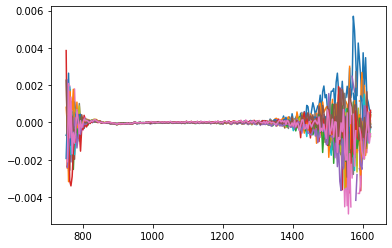

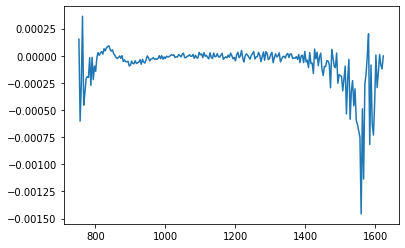

                    -5.0    -4.751      -4.5  ...    -1.249      -1.0      mean
Wavelength(nm)                                ...                              
752.979905     -0.000695       NaN       NaN  ...  0.002264       NaN  0.000152
756.394603     -0.000498 -0.002453 -0.000185  ... -0.000621 -0.002109 -0.000603
759.809699      0.002642  0.000643 -0.000570  ... -0.000510  0.002088 -0.000269
763.225193     -0.000632  0.001358  0.000033  ... -0.000122 -0.000833  0.000363
766.641085     -0.000614 -0.000264 -0.000176  ...  0.000299  0.001361 -0.000455
...                  ...       ...       ...  ...       ...       ...       ...
1608.497301     0.003475  0.000653  0.000383  ... -0.001409 -0.000805 -0.000156
1612.010267     0.001339  0.000717  0.000322  ... -0.000475 -0.000193  0.000011
1615.523631     0.001109  0.000323 -0.000406  ... -0.000530  0.000561 -0.000087
1619.037392     0.000732  0.000524  0.000050  ...  0.000272 -0.001112 -0.000122
1622.551552     0.000550 -0.000071  0.00

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


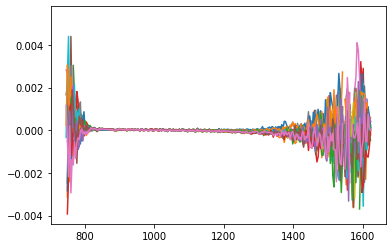

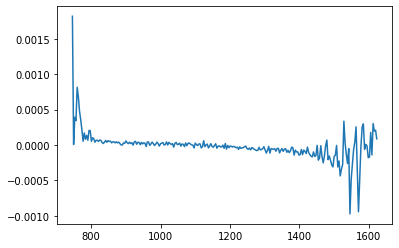

                    -5.0    -4.751      -4.5  ...    -1.251      -1.0      mean
Wavelength(nm)                                ...                              
746.151702           NaN       NaN       NaN  ...       NaN  0.001175  0.001818
749.565604     -0.002473 -0.003124       NaN  ...       NaN -0.000331  0.000006
752.979905      0.001008  0.001762 -0.000322  ... -0.002015 -0.002177  0.000392
756.394603      0.000042 -0.002409  0.001464  ...       NaN  0.000204  0.000344
759.809699     -0.002033  0.000621  0.002131  ... -0.000622 -0.002934  0.000815
...                  ...       ...       ...  ...       ...       ...       ...
1608.497301     0.000799 -0.002301  0.000410  ... -0.000526 -0.000517 -0.000140
1612.010267     0.001461 -0.000207  0.000250  ...  0.001002 -0.000540  0.000302
1615.523631     0.000196  0.000184  0.000353  ... -0.000712  0.000749  0.000196
1619.037392    -0.000104  0.000037 -0.000246  ... -0.000001  0.000141  0.000208
1622.551552     0.000141 -0.000158 -0.00

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


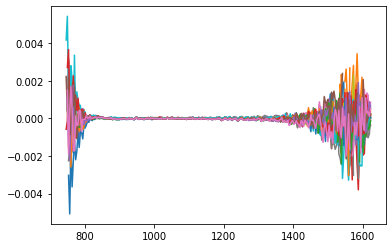

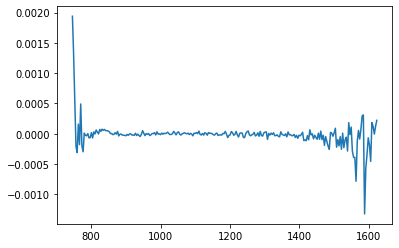

                    -5.0    -4.751    -4.501  ...    -1.249    -1.001      mean
Wavelength(nm)                                ...                              
746.151702           NaN       NaN       NaN  ...  0.001932       NaN  0.001940
749.565604           NaN -0.001001  0.000551  ...       NaN  0.001503  0.001313
752.979905      0.003136       NaN -0.000627  ...  0.002168 -0.001870  0.000535
756.394603     -0.000185  0.001874  0.001039  ... -0.000866  0.000435 -0.000209
759.809699     -0.000347 -0.001257 -0.000708  ... -0.000115  0.001708 -0.000311
...                  ...       ...       ...  ...       ...       ...       ...
1608.497301     0.000254  0.000733  0.000451  ...  0.000183  0.001105  0.000184
1612.010267     0.000527  0.000615 -0.000375  ... -0.000237  0.000303  0.000121
1615.523631     0.000367  0.000039 -0.000659  ...  0.000098  0.000355 -0.000006
1619.037392    -0.000165  0.000888  0.000412  ...  0.000336  0.000111  0.000122
1622.551552     0.000038  0.000363  0.00

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


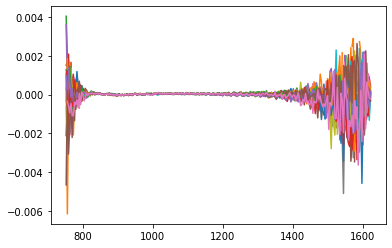

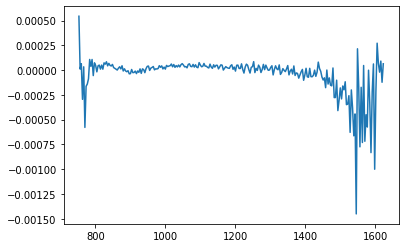

                    -5.0    -4.751    -4.501  ...    -1.249      -1.0      mean
Wavelength(nm)                                ...                              
752.979905           NaN  0.000976  0.004032  ... -0.004648       NaN  0.000544
756.394603      0.000479 -0.006142  0.001914  ...  0.000206 -0.000350  0.000010
759.809699      0.000609 -0.000244  0.001736  ... -0.003061 -0.000578  0.000064
763.225193      0.000746 -0.001212  0.001152  ... -0.001468 -0.000948 -0.000295
766.641085     -0.000616 -0.000948  0.000313  ... -0.000282 -0.000454  0.000033
...                  ...       ...       ...  ...       ...       ...       ...
1608.497301     0.000638  0.000075  0.001329  ...  0.002217 -0.001749  0.000069
1612.010267     0.000527  0.001195 -0.000145  ...  0.000263  0.000649 -0.000020
1615.523631     0.000445  0.000852 -0.000268  ...  0.000388  0.000200  0.000091
1619.037392     0.000224 -0.000009 -0.000292  ... -0.000215 -0.000169 -0.000123
1622.551552     0.000190  0.000093  0.00

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


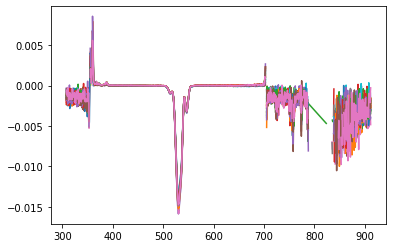

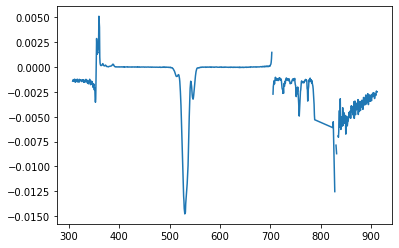

                    -5.0    -4.751      -4.5  ...    -1.249      -1.0      mean
Wavelength(nm)                                ...                              
307.686779     -0.001523 -0.002086 -0.001518  ... -0.001711 -0.000684 -0.001423
308.257451     -0.001347 -0.002155 -0.001618  ... -0.000894 -0.001094 -0.001346
308.828162     -0.001235 -0.002396 -0.001090  ... -0.001582 -0.000546 -0.001260
309.398912     -0.001400 -0.001004 -0.000663  ... -0.001254 -0.000698 -0.001288
309.969701     -0.002485 -0.001796 -0.001719  ... -0.001279 -0.001320 -0.001412
...                  ...       ...       ...  ...       ...       ...       ...
909.320335     -0.003203 -0.004567 -0.002718  ... -0.002449 -0.001925 -0.002857
909.930533     -0.001621 -0.003919 -0.003319  ... -0.002840 -0.001722 -0.002583
910.540769     -0.003063 -0.002074 -0.003082  ... -0.001731 -0.002108 -0.002418
911.151045     -0.002478 -0.003117 -0.001523  ... -0.002752 -0.000921 -0.002552
911.761359     -0.002715 -0.002483 -0.00

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


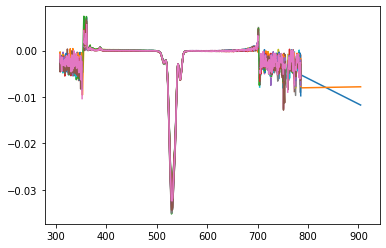

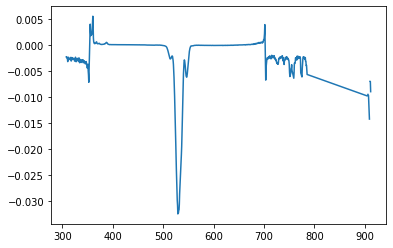

                    -5.0    -4.751      -4.5  ...    -1.249      -1.0      mean
Wavelength(nm)                                ...                              
307.686779     -0.001783 -0.003249 -0.000388  ... -0.002487 -0.000808 -0.002286
308.257451     -0.001573 -0.001571 -0.002414  ... -0.004603 -0.002201 -0.002430
308.828162     -0.003096 -0.000882 -0.003101  ... -0.004074 -0.002643 -0.002302
309.398912     -0.003960 -0.003281 -0.002937  ... -0.002561 -0.002206 -0.002448
309.969701     -0.004075 -0.002768 -0.002973  ... -0.003033 -0.002891 -0.002691
...                  ...       ...       ...  ...       ...       ...       ...
909.320335           NaN       NaN -0.014216  ...       NaN       NaN -0.014216
909.930533           NaN       NaN       NaN  ...       NaN       NaN       NaN
910.540769           NaN -0.006731       NaN  ...       NaN       NaN -0.006982
911.151045     -0.006015       NaN       NaN  ...       NaN       NaN -0.007002
911.761359           NaN       NaN -0.00

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


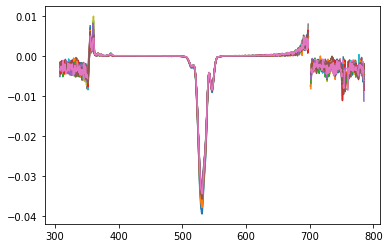

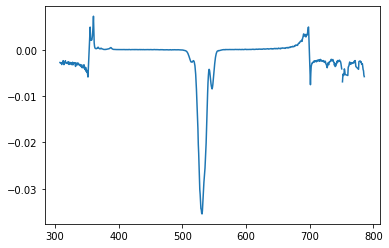

                    -5.0    -4.751      -4.5  ...    -1.249      -1.0      mean
Wavelength(nm)                                ...                              
307.686779     -0.003297 -0.003123 -0.002890  ... -0.001722 -0.003175 -0.002765
308.257451     -0.002887 -0.003309 -0.001949  ... -0.001952 -0.003659 -0.002771
308.828162     -0.003332 -0.002083 -0.002608  ... -0.002312 -0.003348 -0.002827
309.398912     -0.002877 -0.003563 -0.002079  ... -0.003203 -0.002569 -0.002910
309.969701     -0.003667 -0.001615 -0.003054  ... -0.003891 -0.003050 -0.002817
...                  ...       ...       ...  ...       ...       ...       ...
783.242328     -0.002253 -0.005441 -0.004267  ... -0.004907 -0.002792 -0.003767
783.844458     -0.005219 -0.004989 -0.006475  ... -0.004274 -0.004434 -0.004299
784.446626     -0.004049 -0.003909 -0.003151  ... -0.005914 -0.005934 -0.004539
785.048833     -0.004098 -0.007279       NaN  ... -0.005733 -0.006046 -0.005508
785.651079     -0.005942       NaN      

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


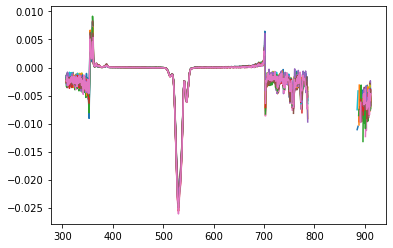

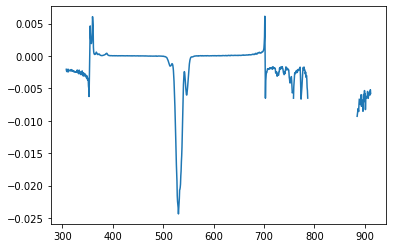

                    -5.0    -4.751      -4.5  ...    -1.249      -1.0      mean
Wavelength(nm)                                ...                              
307.686779     -0.001538 -0.002234 -0.002811  ... -0.002172 -0.002313 -0.002061
308.257451     -0.002756 -0.002087 -0.003446  ... -0.002731 -0.002514 -0.002342
308.828162     -0.002173 -0.001434 -0.002389  ... -0.002226 -0.001661 -0.002246
309.398912     -0.003563 -0.002027 -0.002454  ... -0.002326 -0.002357 -0.002438
309.969701     -0.002306 -0.002851 -0.002584  ... -0.001960 -0.002371 -0.002246
...                  ...       ...       ...  ...       ...       ...       ...
909.320335     -0.005137 -0.006354 -0.004246  ... -0.007014 -0.008449 -0.005666
909.930533     -0.007095 -0.004980 -0.006094  ... -0.006078 -0.004638 -0.005573
910.540769     -0.006362 -0.004022 -0.007547  ... -0.004571 -0.005336 -0.006028
911.151045     -0.005809 -0.004125 -0.005726  ... -0.004499 -0.005905 -0.005216
911.761359     -0.006011 -0.006067 -0.00

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


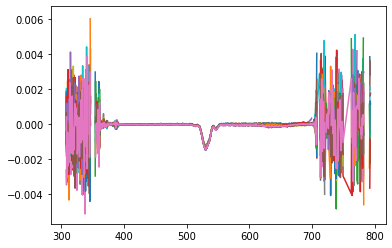

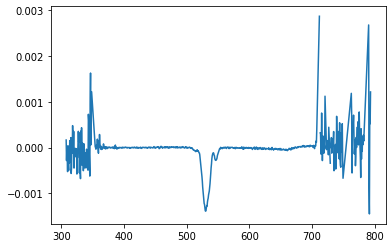

                    -5.0    -4.751      -4.5  ...    -1.249      -1.0      mean
Wavelength(nm)                                ...                              
307.686779      0.000170  0.001437 -0.000037  ...  0.000679 -0.000314  0.000167
308.257451      0.001792  0.000515 -0.001609  ... -0.000140  0.000445 -0.000282
308.828162      0.000208 -0.000573 -0.000369  ...  0.000219 -0.003060 -0.000024
309.398912      0.000684  0.001046  0.000342  ...  0.000001 -0.002756 -0.000180
309.969701     -0.003293  0.002510 -0.001967  ... -0.002723 -0.000454 -0.000524
...                  ...       ...       ...  ...       ...       ...       ...
791.675673           NaN -0.002488       NaN  ...       NaN       NaN -0.001448
792.278346      0.003869 -0.000503       NaN  ...       NaN       NaN  0.000862
792.881058      0.002841       NaN       NaN  ...  0.001635       NaN  0.000522
793.483808           NaN       NaN  0.002234  ...  0.001786       NaN  0.001217
795.895197           NaN       NaN      

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


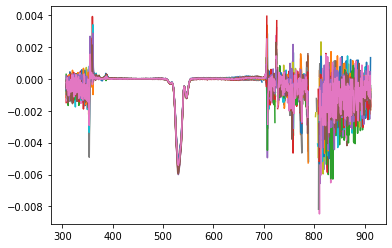

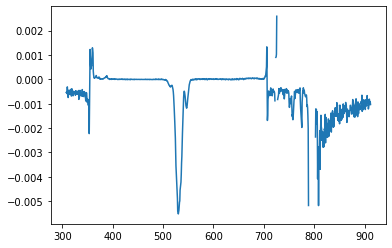

                    -5.0    -4.751      -4.5  ...    -1.249      -1.0      mean
Wavelength(nm)                                ...                              
307.686779     -0.000772 -0.001156 -0.000293  ... -0.000091 -0.000228 -0.000539
308.257451     -0.000413 -0.000750 -0.000406  ... -0.000554 -0.000304 -0.000528
308.828162     -0.000422 -0.000251 -0.000845  ... -0.000303 -0.000609 -0.000518
309.398912     -0.000731 -0.000593 -0.000865  ... -0.000196 -0.000567 -0.000589
309.969701     -0.000212  0.000021 -0.000406  ... -0.001067  0.000065 -0.000311
...                  ...       ...       ...  ...       ...       ...       ...
909.320335     -0.000422 -0.000950 -0.000606  ... -0.000754 -0.000195 -0.000813
909.930533      0.000026 -0.000346 -0.000569  ... -0.001272 -0.000716 -0.000878
910.540769     -0.000496 -0.002217 -0.000690  ... -0.001288 -0.001224 -0.001041
911.151045     -0.000634 -0.001351 -0.001277  ... -0.001092  0.000215 -0.000926
911.761359      0.001322 -0.000646 -0.00

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


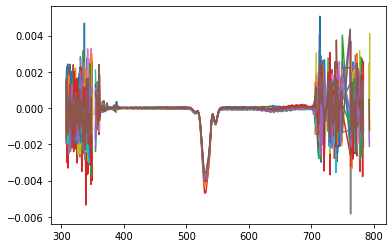

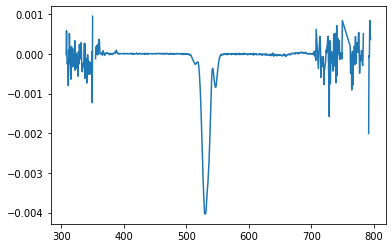

                    -5.0    -4.751      -4.5  ...      -1.5    -1.249      mean
Wavelength(nm)                                ...                              
307.686779      0.000405  0.000219 -0.000265  ... -0.000584 -0.001655 -0.000011
308.257451      0.001556  0.000437  0.000294  ...  0.001456  0.001587  0.000585
308.828162      0.000413  0.001003  0.001557  ... -0.001112 -0.000380 -0.000034
309.398912     -0.000783 -0.000592  0.001109  ... -0.000098  0.000213 -0.000252
309.969701      0.000906 -0.000263 -0.000197  ... -0.000345 -0.000641 -0.000216
...                  ...       ...       ...  ...       ...       ...       ...
791.675673           NaN       NaN       NaN  ...       NaN       NaN -0.002007
792.278346           NaN       NaN       NaN  ... -0.001316  0.000466 -0.000042
792.881058     -0.002388 -0.000374  0.000356  ... -0.002107 -0.001210 -0.000082
793.483808           NaN       NaN       NaN  ...       NaN       NaN  0.000846
794.689425           NaN       NaN      

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


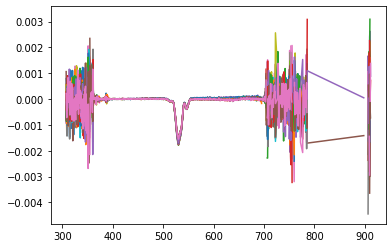

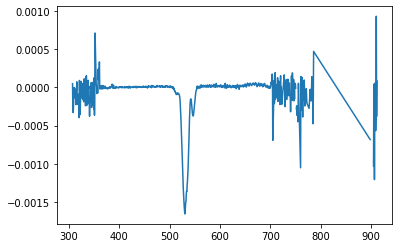

                    -5.0    -4.751      -4.5  ...    -1.249      -1.0      mean
Wavelength(nm)                                ...                              
307.686779      0.000793  0.000009  0.000105  ...  0.000166  0.000213  0.000049
308.257451      0.000526 -0.000543 -0.000116  ... -0.000816 -0.000322 -0.000271
308.828162     -0.000117 -0.001265 -0.000106  ... -0.000381 -0.000719 -0.000330
309.398912     -0.000201 -0.000576  0.000101  ... -0.000261  0.000070 -0.000284
309.969701     -0.000083 -0.000741 -0.000607  ...  0.000036 -0.000408 -0.000132
...                  ...       ...       ...  ...       ...       ...       ...
908.710176      0.000709 -0.002032 -0.003023  ... -0.002798 -0.001443 -0.000567
909.320335     -0.001187 -0.001406 -0.000185  ...  0.000964 -0.002942 -0.000340
909.930533           NaN -0.000117 -0.000340  ...  0.000154       NaN  0.000933
910.540769           NaN -0.001569  0.000823  ... -0.000745 -0.000084 -0.000382
911.151045     -0.000484       NaN      

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


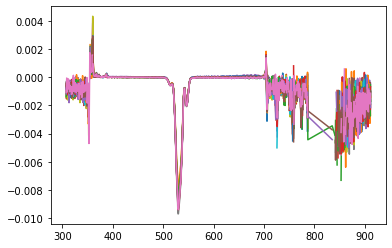

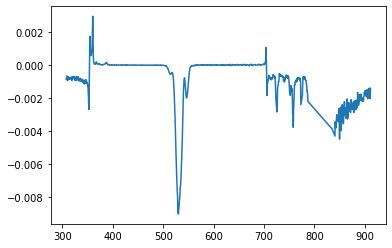

                    -5.0    -4.751      -4.5  ...    -1.251      -1.0      mean
Wavelength(nm)                                ...                              
307.686779     -0.000667 -0.000590 -0.000697  ... -0.000424 -0.001071 -0.000872
308.257451     -0.000567 -0.000608 -0.000697  ... -0.000713 -0.000811 -0.000807
308.828162     -0.000767 -0.000574 -0.000498  ... -0.000286 -0.000050 -0.000651
309.398912     -0.000580 -0.000972 -0.000543  ... -0.000360 -0.001050 -0.000684
309.969701     -0.000695 -0.000744 -0.000948  ... -0.000949 -0.000920 -0.000752
...                  ...       ...       ...  ...       ...       ...       ...
908.710176     -0.000775 -0.002005 -0.002538  ... -0.001304 -0.001095 -0.001391
909.320335     -0.001948 -0.001959 -0.001414  ... -0.001953 -0.001105 -0.001620
909.930533     -0.002350 -0.001911 -0.000953  ... -0.001726 -0.001837 -0.002030
910.540769     -0.001895 -0.001255 -0.001346  ... -0.000954 -0.001909 -0.001711
911.151045     -0.000971 -0.001388 -0.00

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


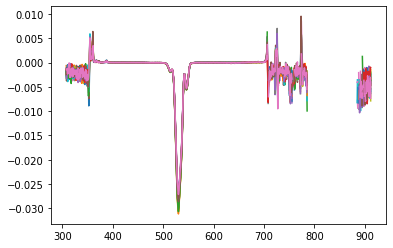

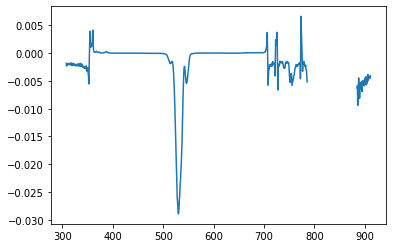

                    -5.0    -4.751      -4.5  ...    -1.249      -1.0      mean
Wavelength(nm)                                ...                              
307.686779     -0.001152 -0.000631 -0.001980  ... -0.002455 -0.001310 -0.001835
308.257451     -0.001968 -0.002141 -0.002074  ... -0.001823 -0.001456 -0.002320
308.828162     -0.002040 -0.001921 -0.001562  ... -0.002033 -0.001602 -0.001925
309.398912     -0.002367 -0.003582 -0.002065  ... -0.002126 -0.001644 -0.002101
309.969701     -0.002701 -0.001970 -0.001822  ... -0.001333 -0.002335 -0.002038
...                  ...       ...       ...  ...       ...       ...       ...
909.320335     -0.006501 -0.006431 -0.003476  ... -0.004242 -0.004741 -0.004337
909.930533     -0.005643 -0.005341 -0.005135  ... -0.005949 -0.004563 -0.004584
910.540769     -0.004077 -0.006429 -0.004072  ... -0.003133 -0.005409 -0.004391
911.151045     -0.004560 -0.005312 -0.004468  ... -0.003766 -0.003079 -0.004078
911.761359     -0.006346 -0.001477 -0.00

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


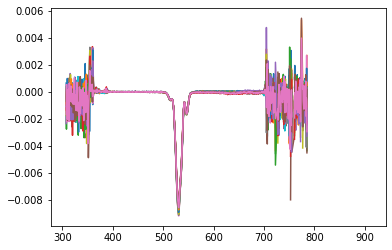

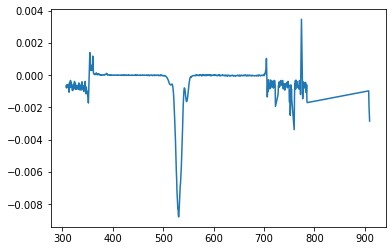

                    -5.0    -4.751      -4.5  ...    -1.251      -1.0      mean
Wavelength(nm)                                ...                              
307.686779     -0.000644 -0.001391 -0.000684  ... -0.000590 -0.001666 -0.000666
308.257451     -0.001279 -0.001106 -0.002769  ...  0.000267  0.000532 -0.000795
308.828162      0.000059  0.000449 -0.000707  ... -0.000932 -0.000199 -0.000600
309.398912     -0.000351 -0.000098 -0.000251  ... -0.000819 -0.001209 -0.000641
309.969701      0.000994 -0.000914 -0.000941  ... -0.000287 -0.002035 -0.000669
...                  ...       ...       ...  ...       ...       ...       ...
907.489975           NaN       NaN       NaN  ...       NaN       NaN -0.000975
908.100056           NaN       NaN       NaN  ...       NaN -0.001880 -0.001880
909.320335           NaN       NaN       NaN  ...       NaN       NaN -0.002848
910.540769           NaN       NaN       NaN  ...       NaN       NaN       NaN
911.151045      0.000762       NaN -0.00

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


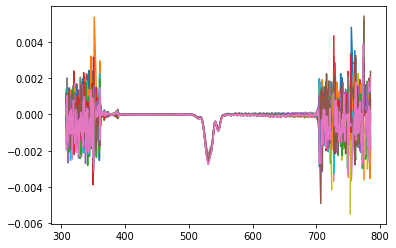

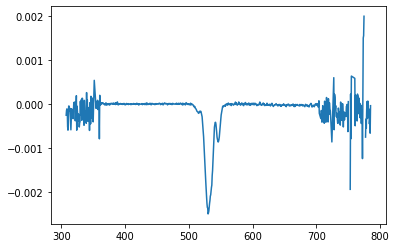

                    -5.0    -4.751      -4.5  ...    -1.251      -1.0      mean
Wavelength(nm)                                ...                              
307.686779     -0.000720 -0.001654 -0.000983  ...  0.001165 -0.001072 -0.000260
308.257451     -0.000256  0.000357 -0.000912  ...  0.000748 -0.001979 -0.000153
308.828162      0.000543  0.000440 -0.000467  ... -0.000281 -0.001019 -0.000115
309.398912     -0.000126 -0.000171 -0.000044  ... -0.000869  0.001033 -0.000138
309.969701      0.000193 -0.000847 -0.001239  ... -0.000868 -0.001545 -0.000521
...                  ...       ...       ...  ...       ...       ...       ...
782.640237     -0.000504  0.001027 -0.001091  ... -0.000550  0.000467 -0.000118
783.242328      0.000756  0.001529  0.001258  ... -0.000055 -0.002585 -0.000457
783.844458     -0.000708 -0.000584 -0.001209  ...  0.001157  0.000258 -0.000356
784.446626      0.000250  0.000266 -0.002191  ... -0.001403 -0.001890 -0.000668
785.048833           NaN -0.000064      

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


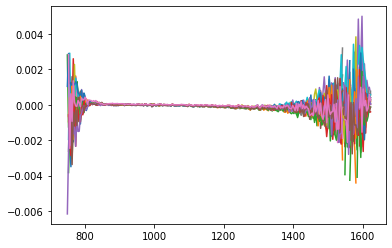

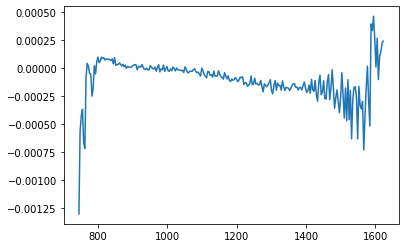

                    -5.0    -4.751      -4.5  ...    -1.249      -1.0      mean
Wavelength(nm)                                ...                              
746.151702           NaN       NaN       NaN  ...       NaN       NaN -0.001306
749.565604           NaN       NaN  0.002813  ...       NaN       NaN -0.000563
752.979905           NaN -0.000959 -0.001283  ...  0.000016  0.002833 -0.000429
756.394603     -0.002117  0.000311  0.000032  ...       NaN -0.002460 -0.000371
759.809699     -0.003499 -0.000430  0.000778  ... -0.000162  0.000617 -0.000672
...                  ...       ...       ...  ...       ...       ...       ...
1608.497301    -0.000535 -0.001274 -0.000422  ... -0.000985  0.000237 -0.000106
1612.010267     0.000365  0.000093 -0.000158  ... -0.000186 -0.000352  0.000106
1615.523631    -0.000183  0.000380 -0.000279  ...  0.000183 -0.000195  0.000141
1619.037392     0.000051  0.000462  0.000165  ... -0.000428  0.000588  0.000221
1622.551552     0.000085  0.000396  0.00

In [ ]:
def del_background(data):
  data_b = data[data.columns[data.columns<=-1]]
  for value in data_b.columns:
    plt.plot(np.asarray(data_b.index), np.asarray(data_b[value]))
  data_b['mean'] = data_b.mean(axis=1)
  plt.show()
  plt.plot(np.asarray(data_b.index), np.asarray(data_b['mean']))
  plt.show()
  print(data_b)
  data_c = data
  for col in data_c.columns:
    data_c[col] = data_c[col] - data_b['mean']
  print(data_c)
  return data_c
for name in Spec_data:
  Spec_data[name] = del_background(Spec_data[name])


2. Clean up noise

In [ ]:
for name in Spec_data:
  if 'UvVis' in name:
    new = Spec_data[name][~((Spec_data[name].index >= 400) & (Spec_data[name].index <= 700))]
    print(Spec_data[name].loc[new.index, :])
    Spec_data[name].loc[new.index, :] = np.nan
  else:
    print(name)
    new = Spec_data[name][~((Spec_data[name].index < 1400) & (Spec_data[name].index > 850))]
    print(Spec_data[name].loc[new.index, :])
    Spec_data[name].loc[new.index, :] = np.nan
#remember to remove laser signal
for name in Spec_data:
  if 'UvVis' in name:
    new = Spec_data[name][((Spec_data[name].index <= 540) & (Spec_data[name].index >= 500))]
    print(Spec_data[name].loc[new.index, :])
    Spec_data[name].loc[new.index, :] = np.nan
    

12 CSA ITIC 1mW magic angle -5--1000ps
                -5.000     -4.751     ...   844.461    1000.000
Wavelength(nm)                        ...                      
746.151702       0.000947   0.002501  ...        NaN  -0.002698
749.565604            NaN   0.001881  ...  -0.003902  -0.001784
752.979905      -0.000258  -0.001367  ...   0.000010  -0.000458
756.394603      -0.001772   0.001004  ...  -0.000777  -0.000057
759.809699      -0.001138  -0.000790  ...   0.000433  -0.000299
...                   ...        ...  ...        ...        ...
1608.497301     -0.001130  -0.000350  ...   0.000092  -0.000464
1612.010267     -0.000554   0.000399  ...   0.000346   0.000024
1615.523631     -0.000035   0.000128  ...   0.000268  -0.000464
1619.037392      0.000176   0.000076  ...   0.000520  -0.000096
1622.551552     -0.000325   0.000065  ...  -0.000338  -0.000512

[95 rows x 75 columns]
11 OX ITIC 1mW magic angle -5--1000ps
                -5.001    -4.749    -4.500    ...   713.112   844.4

In [ ]:
~((Spec_data['12 CSA ITIC 1mW magic angle -5--1000ps'].index < 1300) & (Spec_data['12 CSA ITIC 1mW magic angle -5--1000ps'].index > 900))

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

3. Compensate for pump intensity

In [ ]:
for name in Spec_data:
  if 'UvVis' in name:
     Spec_data[name] = Spec_data[name]/0.6
     print(Spec_data[name])


                -5.000    -4.751    -4.500    ...   799.091   891.677   995.000
Wavelength(nm)                                ...                              
307.686779           NaN       NaN       NaN  ...       NaN       NaN       NaN
308.257451           NaN       NaN       NaN  ...       NaN       NaN       NaN
308.828162           NaN       NaN       NaN  ...       NaN       NaN       NaN
309.398912           NaN       NaN       NaN  ...       NaN       NaN       NaN
309.969701           NaN       NaN       NaN  ...       NaN       NaN       NaN
...                  ...       ...       ...  ...       ...       ...       ...
909.320335           NaN       NaN       NaN  ...       NaN       NaN       NaN
909.930533           NaN       NaN       NaN  ...       NaN       NaN       NaN
910.540769           NaN       NaN       NaN  ...       NaN       NaN       NaN
911.151045           NaN       NaN       NaN  ...       NaN       NaN       NaN
911.761359           NaN       NaN      

4. Chirp Correction
(& fit t0?)

12 CSA ITIC 1mW magic angle -5--1000ps
[6.02329871e-01 1.37705465e-06 1.69650712e+00 4.09003449e-01]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  


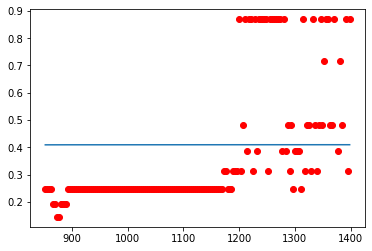

11 OX ITIC 1mW magic angle -5--1000ps

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  



[5.97868442e-01 1.37705055e-06 1.71066862e+00 4.13833599e-01]


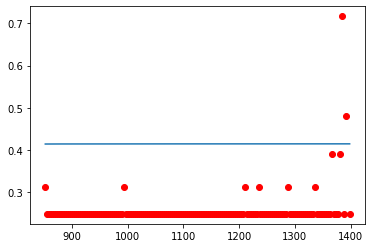

10 CF ITIC 1mW magic angle -5--1000ps
[5.97682063e-01 1.37705095e-06 1.70970791e+00 4.24144031e-01]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  


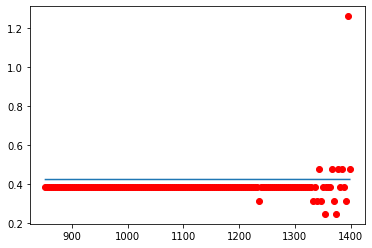

08 CSA PBDBT 1mW magic angle -5--4000ps
[5.98944000e-01 1.37705093e-06 1.70939515e+00 4.05712752e-01]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  


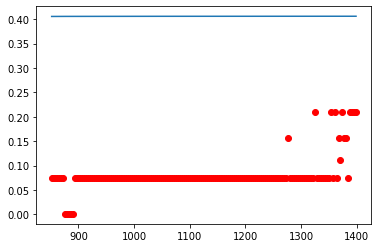

09 CB ITIC 1mW magic angle -5--1000ps
[6.02273349e-01 1.37705105e-06 1.69741810e+00 4.15483129e-01]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  


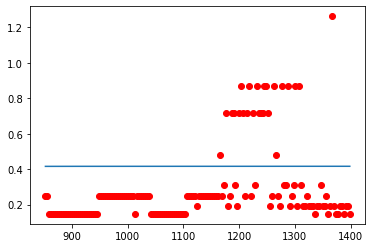

04 CSA blend 1mW magic angle -5--4000ps
[6.00835425e-01 1.37705091e-06 1.70316218e+00 4.03168128e-01]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  


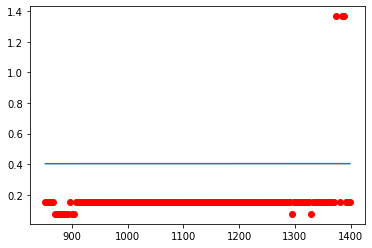

06 CF PBDBT 1mW magic angle -5--4000ps
[5.98620226e-01 1.37705062e-06 1.70972745e+00 4.09384470e-01]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  


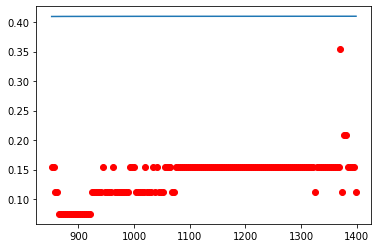

02 CF blend 1mW magic angle -5--4000ps
[6.12356869e-01 1.37705058e-06 1.66456020e+00 4.06887364e-01]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  


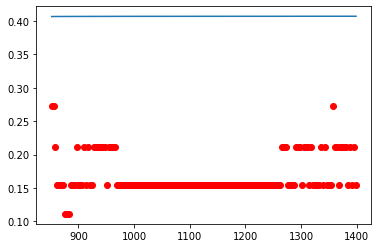

05 CB PBDBT 1mW magic angle -5--4000ps
[5.98598177e-01 1.37705075e-06 1.70975912e+00 4.13188993e-01]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  


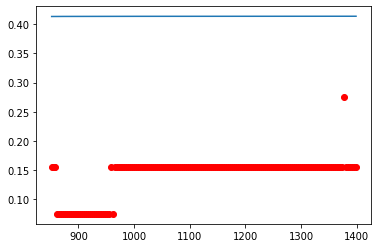

03 OX blend 1mW magic angle -5--4000ps
[-0.07247461  1.40024574  2.28744082  0.3323372 ]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  


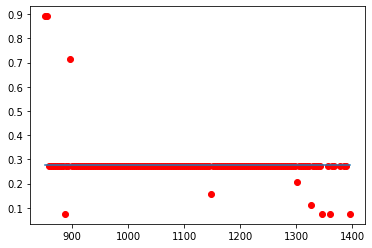

01 CB blend 1mW magic angle -5--4000ps
[5.98403192e-01 1.37705058e-06 1.71009995e+00 4.14519591e-01]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  


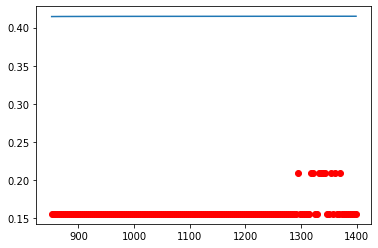

11 UvVis magi angle 0.6mW 532nm
[6.08535769e-01 6.91044347e-06 1.68018966e+00 2.83046827e-01]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  


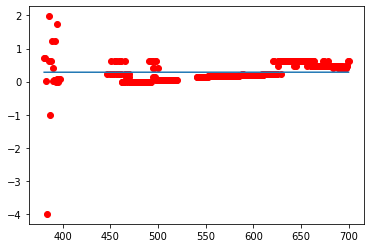

12 UvVis magi angle 0.6mW 532nm
[6.07210151e-01 6.90801710e-06 1.63294590e+00 4.18341328e-01]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  


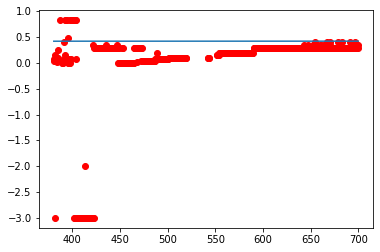

10 UvVis magi angle 0.6mW 532nm
[-0.1875396   0.96693367  2.50301599  0.54019929]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


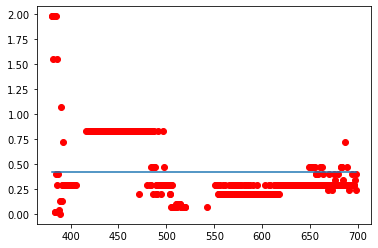

09 UvVis magi angle 0.6mW 532nm
[6.00241551e-01 6.84573293e-06 1.70505139e+00 4.03741340e-01]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  


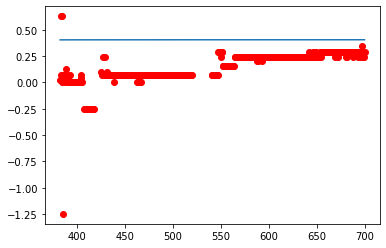

05 UvVis magi angle 0.6mW 532nm


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  


[5.99811000e-01 6.90801735e-06 1.70555408e+00 4.10738145e-01]


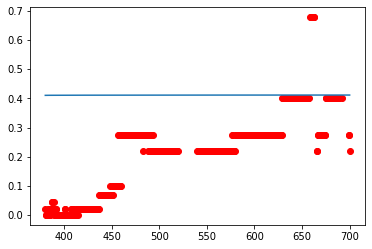

07 UvVis magi angle 0.6mW 532nm
[6.01946885e-01 6.90801757e-06 1.69863411e+00 4.49683623e-01]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  


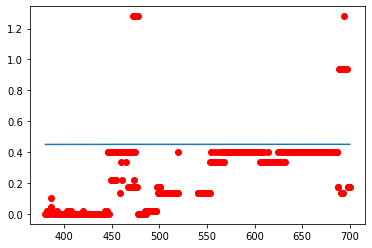

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  


08 UvVis magi angle 0.6mW 532nm
[5.99209646e-01 6.90801695e-06 1.70744770e+00 4.12638147e-01]


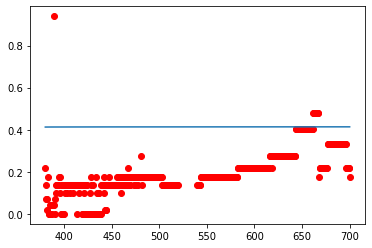

04 UvVis magi angle 0.6mW 532nm
[6.01785939e-01 6.90801752e-06 1.69968309e+00 4.32211243e-01]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  


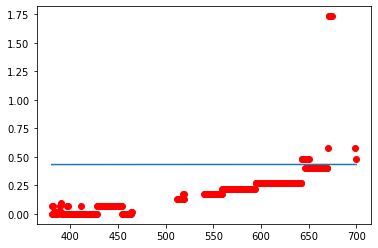

03 UvVis magi angle 0.8mW 532nm


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  


[6.34602571e-01 6.90802584e-06 1.65842635e+00 5.62542717e-01]


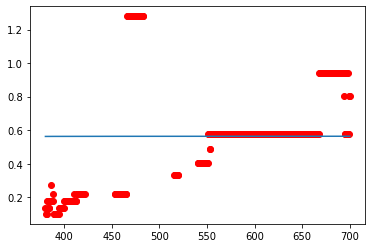

06 UvVis magi angle 0.6mW 532nm
[5.98834365e-01 6.90801753e-06 1.70826407e+00 4.20061691e-01]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  


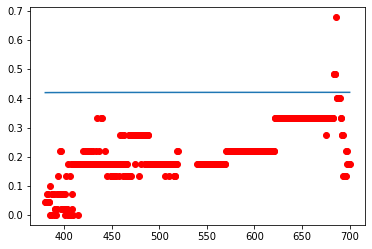

01 UvVis magi angle 0.8mW 532nm
[6.09099214e-01 6.90804443e-06 1.66155440e+00 5.20850089e-01]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  


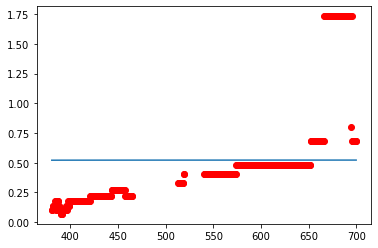

02 UvVis magi angle 0.8mW 532nm
[5.97959606e-01 6.90805533e-06 1.70965751e+00 4.16870488e-01]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  


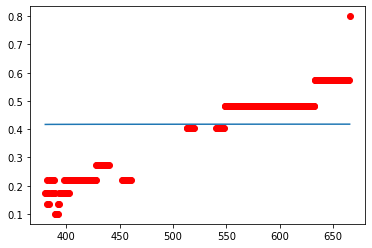

07 OX 1mW magic angle -5--4000ps
[5.98996534e-01 1.37705057e-06 1.70920010e+00 4.35472070e-01]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  


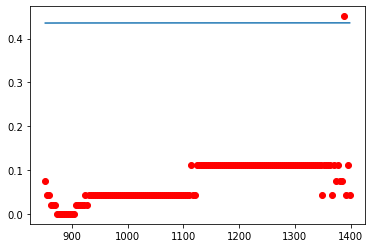

In [ ]:
for name in Spec_data:
  data = Spec_data[name].abs()
  data = data[data.idxmax(axis=1)<=2]
  x = np.asarray(data.index)
  y = np.asarray(data.idxmax(axis=1))
  print(name)
  plt.plot(x,y, 'ro')
  def chirp_func(w, a, b, c, d): return a*np.sqrt((b*(w**2)-1)/(c*(w**2)-1))+ d
  params, params_covariance = optimize.curve_fit(chirp_func, x, y, maxfev=100000)
  print(params)
  plt.plot(x, chirp_func(x, *params))
  plt.show()

5. Merge data

In [ ]:
merged_data = {}
for name1 in Spec_data:
  for name2 in Spec_data:
    Spec_data[name1].columns = np.around(Spec_data[name1].columns, 2)
    Spec_data[name2].columns = np.around(Spec_data[name2].columns, 2)
    if (name1 != name2) & (name1[0:2] == name2[0:2]):
      comb = pd.concat([Spec_data[name1], Spec_data[name2]])
      if 'UvVis' not in name1:
        new_name = name1[0:12]
      elif 'UvVis' not in name2:
        new_name = name2[0:12]
      comb['Energy(eV)'] = 1239.842/comb.index
      comb = comb.set_index('Energy(eV)')
      merged_data[new_name] = comb.sort_index()
merged_data['11 OX ITIC 1'][-5.000][merged_data['11 OX ITIC 1'][-5.000].notna()]



Energy(eV)
0.886585    0.000011
0.888802   -0.000201
0.891030   -0.000003
0.893269   -0.000313
0.895519   -0.000075
              ...   
3.081329    0.000029
3.085754    0.000062
3.090191    0.000042
3.094642    0.000036
3.099104    0.000034
Name: -5.0, Length: 603, dtype: float64

Plotting using overlapping 2d spectra

In [ ]:
#https://stackoverflow.com/questions/16475384/rename-a-dictionary-key
oldkey = '07 OX 1mW ma'
newkey = '07 OX PBDBT'
if newkey!=oldkey:  
    merged_data[newkey] = merged_data[oldkey]
    del merged_data[oldkey]

print(merged_data)

{'12 CSA ITIC ':             -5.00     -4.75     -4.50     ...   891.68    995.00    1000.00
Energy(eV)                                ...                              
0.764131         NaN       NaN       NaN  ...       NaN       NaN       NaN
0.765790         NaN       NaN       NaN  ...       NaN       NaN       NaN
0.767455         NaN       NaN       NaN  ...       NaN       NaN       NaN
0.769128         NaN       NaN       NaN  ...       NaN       NaN       NaN
0.770808         NaN       NaN       NaN  ...       NaN       NaN       NaN
...              ...       ...       ...  ...       ...       ...       ...
3.999881         NaN       NaN       NaN  ...       NaN       NaN       NaN
4.007260         NaN       NaN       NaN  ...       NaN       NaN       NaN
4.014666         NaN       NaN       NaN  ...       NaN       NaN       NaN
4.022099         NaN       NaN       NaN  ...       NaN       NaN       NaN
4.029559         NaN       NaN       NaN  ...       NaN       NaN      

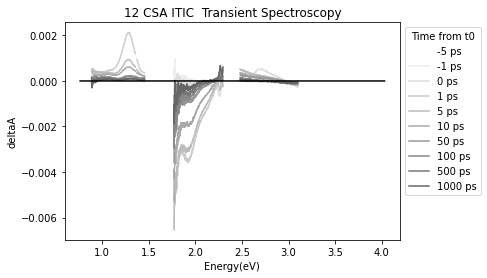

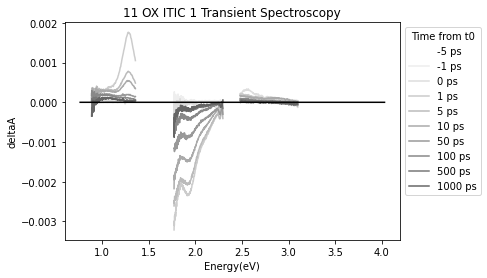

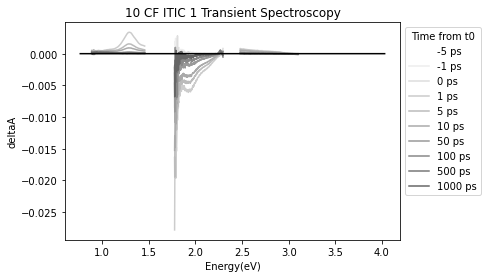

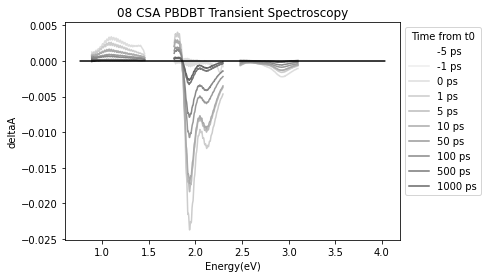

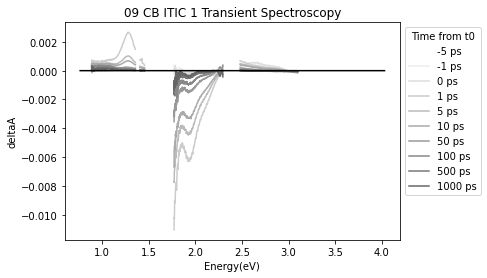

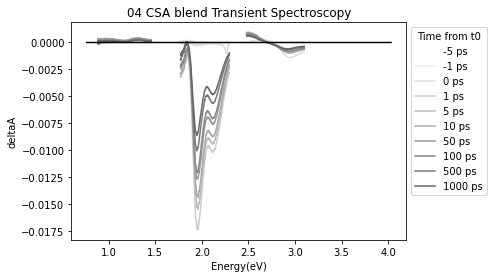

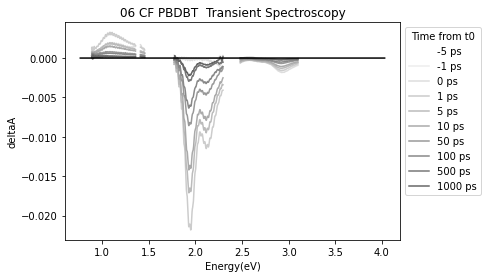

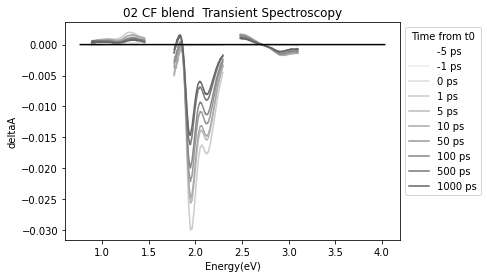

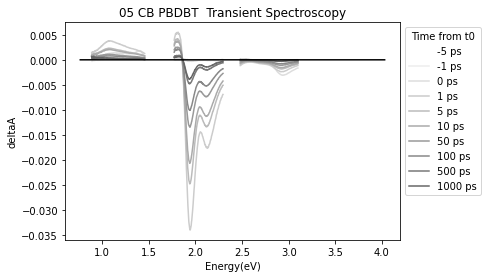

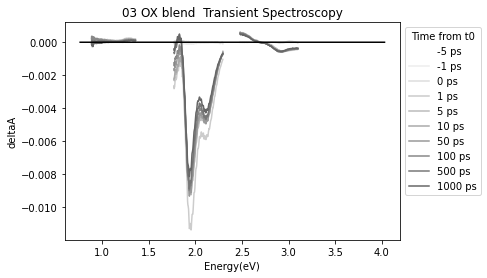

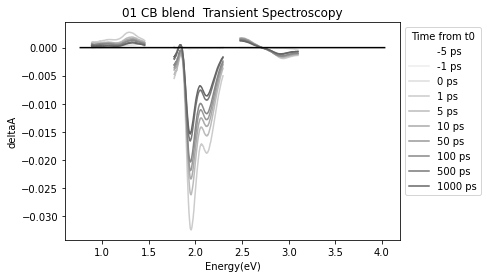

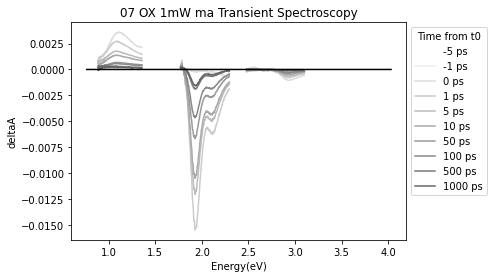

In [ ]:
def spec_time_data(name, times):
  plt.subplots()
  for i in range(len(times)):
      plt.plot(np.asarray(merge_interp[name].index), np.asarray(merge_interp[name][times[i]]),  label=str(dex[i])+' ps', color=colorFader(c1,c2,i/n))
      plt.legend(title='Time from t0', bbox_to_anchor=(1,1), loc="upper left")
      plt.title(name + " Transient Spectroscopy")
      plt.xlabel('Energy(eV)')
      plt.ylabel('deltaA')

#color method from stack exchange :https://stackoverflow.com/questions/25668828/how-to-create-colour-gradient-in-python
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)
c1='white' 
c2='black' 
n=15

#https://codereview.stackexchange.com/questions/189319/nearest-neighbor-algorithm-general-nearest-forward-nearest-or-backward-neares
def find_nearest(array, number, direction=None):
    idx = -1
    if array.empty:
        return idx
    if direction is None:
        idx = (np.abs(array - number)).min()
    elif direction == 'backward':
        _delta = number - array
        _delta_positive = _delta[_delta > 0]
        if not _delta_positive.empty:
            idx = _delta_positive.min()
    elif direction == 'forward':
        _delta = array - number
        _delta_positive = _delta[_delta >= 0]
        if not _delta_positive.empty:
            idx = _delta_positive.min()
    return idx
merge_interp = {}


for name in merge_interp:
  dex = [-5, -1, 0, 1, 5, 10, 50, 100, 500, 1000]
  times = []
  for i in range(len(dex)):
    times.append(np.around(find_nearest(merge_interp[name].columns,dex[i], 'forward')+dex[i], 2))
  spec_time_data(name, times)
  plt.plot(np.array(merge_interp[name].index), np.zeros(len(merge_interp[name].index), dtype=float, order='C'), color='black')
  
plt.show()





  

Plotting a color/heat map
Current issues: 
- non-overlapping time scale leaves white space, distracting
- not showing missing values as gap
- anchor specific color to 0 for reference

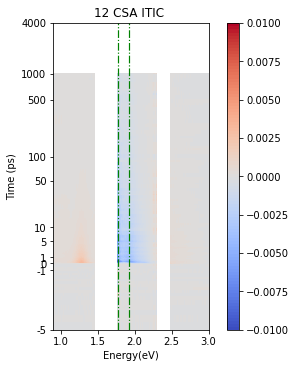

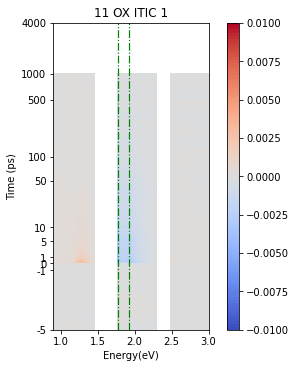

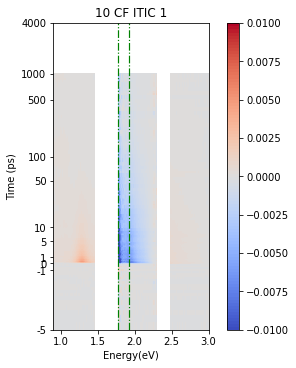

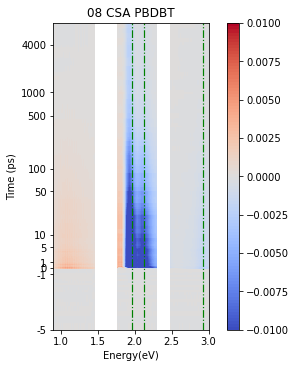

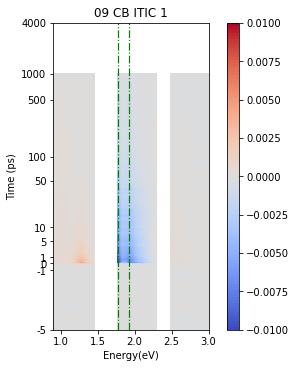

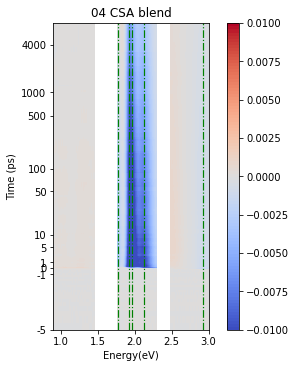

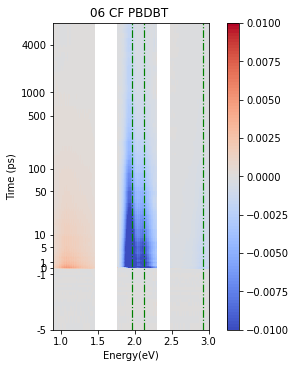

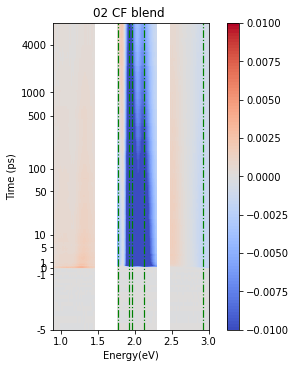

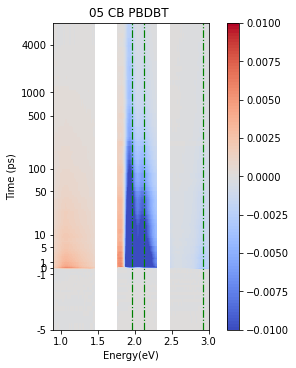

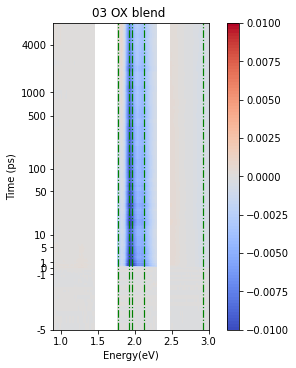

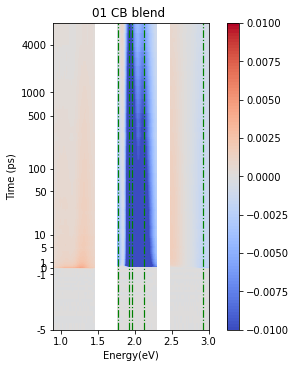

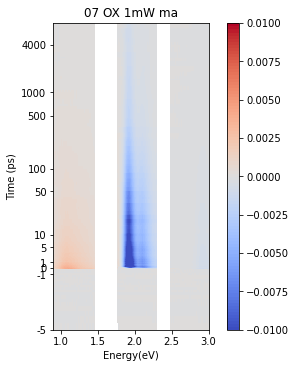

In [ ]:
#method from mathplotlib documentation

viridis = cm.get_cmap('coolwarm', 100)
def plot_examples(colormaps, data, name):
    """
    Helper function to plot data with associated colormap.
    """
    n = len(colormaps)
    fig, axs = plt.subplots(1, n, figsize=(n * 2 + 2, 5),
                            constrained_layout=True, squeeze=False)
    for [ax, cmap] in zip(axs.flat, colormaps):
        psm = ax.pcolormesh(data.index,np.log10(data.columns+6), data.T, cmap=cmap, rasterized=True, vmin=-0.01, vmax=0.01)
        fig.colorbar(psm, ax=ax)
        ax.title.set_text(name)
    plt.xlim(0.9,3.0)
    yvals = np.asarray([-5, -1, 0, 1, 5, 10, 50, 100, 500, 1000, 4000])
    ylogs = np.around(np.log10(yvals + 6), 2)
    plt.yticks(ylogs, labels=yvals)
    if "ITIC" in name:
      peaks = [1.78, 1.93]
    elif "PBDBT" in name:
      peaks = [1.97, 2.12, 2.92]
    elif 'blend' in name:
      peaks = [1.78, 1.93,1.97, 2.12, 2.92]
    else:
      peaks=[]
      
    for eg in peaks:
      plt.axvline(eg, ls='-.', lw=1.2, c='green')

    plt.xlabel('Energy(eV)')
    plt.ylabel('Time (ps)')
for name in merged_data:
  merged_data[name] = (merged_data[name].T).interpolate().T

  plot_examples([viridis], merged_data[name], name)
  plt.show()


Try adding again?

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False]


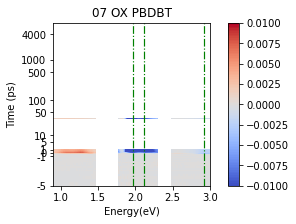

In [ ]:
#method from mathplotlib documentation

viridis = cm.get_cmap('coolwarm', 100)
def plot_comparison(colormaps, solvent):
    """
    Helper function to plot data with associated colormap.
    """
    n = len(colormaps)
    for name in merged_data:
      if solvent in name and 'ITIC' in name:
        d1 = merged_data[name]
      elif solvent in name and 'PBDBT' in name:
        d2 = merged_data[name]
      elif solvent in name and 'blend' in name:
        d3 = merged_data[name]
    print(d1.columns == d2.columns)
    data = (d2+d1)
    fig, axs = plt.subplots(1, n, figsize=(n * 2 + 2, 3),
                            constrained_layout=True, squeeze=False)
    for [ax, cmap] in zip(axs.flat, colormaps):
        psm = ax.pcolormesh(data.index,np.log10(data.columns+6), data.T, cmap=cmap, rasterized=True, vmin=-0.01, vmax=0.01)
        fig.colorbar(psm, ax=ax)
        ax.title.set_text(name)
    plt.xlim(0.9,3.0)
    yvals = np.asarray([-5, -1, 0, 1, 5, 10, 50, 100, 500, 1000, 4000])
    ylogs = np.around(np.log10(yvals + 6), 2)
    plt.yticks(ylogs, labels=yvals)
    if "ITIC" in name:
      peaks = [1.78, 1.93]
    elif "PBDBT" in name:
      peaks = [1.97, 2.12, 2.92]
    elif 'blend' in name:
      peaks = [1.78, 1.93,1.97, 2.12, 2.92]
    else:
      peaks=[]
      
    for eg in peaks:
      plt.axvline(eg, ls='-.', lw=1.2, c='green')

    plt.xlabel('Energy(eV)')
    plt.ylabel('Time (ps)')
    plt.show()
plot_comparison([viridis], 'CB')


Plotting 3d

In [ ]:
#code from https://blog.finxter.com/matplotlib-3d-plot-advanced/
#https://stackoverflow.com/questions/36589521/how-to-surface-plot-3d-plot-from-dataframe
for name in merged_data:
  fig = plt.figure(figsize=(10,10))
  ax = Axes3D(fig)
  # Create x and y 1D arrays
  a = np.asarray(merged_data[name].index)
  b = np.asarray(merged_data[name].columns)
  X,Y = np.meshgrid(a, b)
  # Create X and Y 2D arrays
  Z = merged_data[name].T
  # Plot using Axes notation
  surf = ax.plot_surface(X,Y,Z, rstride=1, cstride=1, cmap=cm.coolwarm,linewidth=1, antialiased=False)
  # Set axes lables
  ax.set(xlabel='Wavelength(nm)', ylabel='time (ps)', zlabel='dA')
  ax.view_init(elev=20, azim=100)
  ax.set_zlim(-.04, .01)
  ax.zaxis.set_major_locator(LinearLocator(10))
  ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

  fig.colorbar(surf, shrink=0.5, aspect=5)
  ax.title.set_text(name + ' Transient Spectroscopy')
  plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  del sys.path[0]


AttributeError: ignored

<Figure size 720x720 with 2 Axes>

AttributeError: ignored

<Figure size 720x720 with 2 Axes>

AttributeError: ignored

<Figure size 720x720 with 2 Axes>

AttributeError: ignored

<Figure size 720x720 with 2 Axes>

AttributeError: ignored

<Figure size 720x720 with 2 Axes>

AttributeError: ignored

<Figure size 720x720 with 2 Axes>

AttributeError: ignored

<Figure size 720x720 with 2 Axes>

AttributeError: ignored

<Figure size 720x720 with 2 Axes>

AttributeError: ignored

<Figure size 720x720 with 2 Axes>

AttributeError: ignored

<Figure size 720x720 with 2 Axes>

AttributeError: ignored

<Figure size 720x720 with 2 Axes>

AttributeError: ignored

<Figure size 720x720 with 2 Axes>

Kinetics?

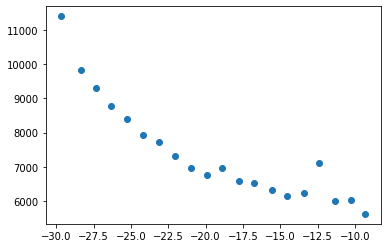

In [ ]:
#merge later, data analysis
name = "MAPI4"
a = []
xmax = []
for spec in sorted(Spec_data):
  if spec[:(len(name))] == name and spec[(len(name)+1):] < '11:38:00' and name == 'MAPI4':
    xmax.append(((Spec_data[spec]['Counts'].max())))
    a.append((pd.to_timedelta(str(Spec_data[spec].rec_time)) - pd.to_timedelta('0 days 11:46:13'))/timedelta(minutes = 1))

plt.scatter(np.asarray(a), (np.asarray(xmax)))



In [ ]:
laser_data = {}
for data in Spec_data:
  df = Spec_data[data][Spec_data[data]['Wavelength(nm)'].between(402,410)]
  df.title = data
  df.rec_time = Spec_data[data].rec_time
  df.int_time = Spec_data[data].int_time
  laser_data[data] = df



In [ ]:
def beam_fit(data):
  #from https://stackoverflow.com/questions/49370795/lorentzian-module
  #from https://millenia.cars.aps.anl.gov/software/python/lmfit/examples/example_use_pandas.html

  data.reset_index(level=0, inplace =True, drop=True)
  model = GaussianModel()
  params = model.guess(data['Counts'], x=data['Wavelength(nm)'])

  result = model.fit(data['Counts'], params, x=data['Wavelength(nm)'])

  result.plot_fit()

 

  data.center = float(result.fit_report()[result.fit_report().find('center:')+12:result.fit_report().find('center:')+18])
  data.sigma = float(result.fit_report()[result.fit_report().find('sigma:')+12:result.fit_report().find('sigma:')+18])
  data.amplitude = float(result.fit_report()[result.fit_report().find('amplitude:')+12:result.fit_report().find('amplitude:')+18])
  data.height = float(result.fit_report()[result.fit_report().find('height:')+12:result.fit_report().find('height:')+18])
  


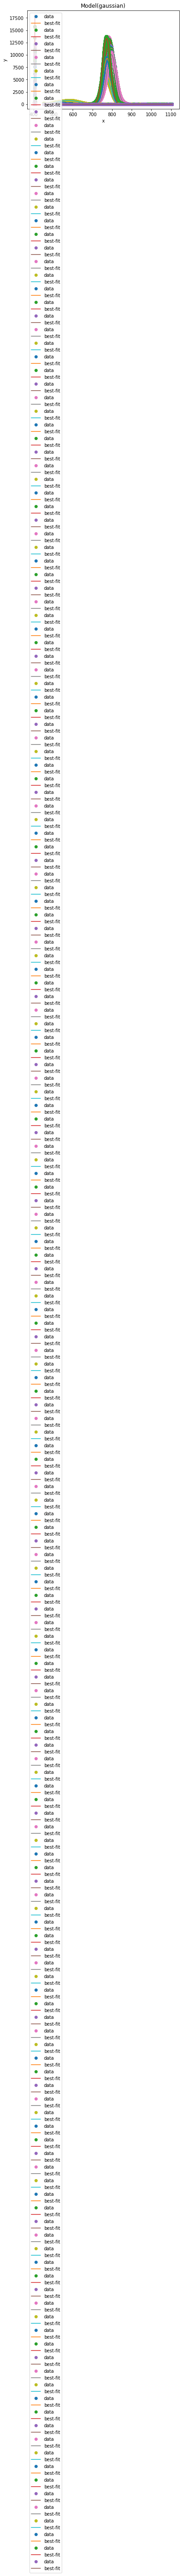

In [ ]:
for data in laser_data:
  beam_fit(laser_data[data])
for data in Spec_data:
  transdata = Spec_data[data][Spec_data[data]['Wavelength(nm)'] > 450]
  beam_fit(transdata)
  transdata.center = Spec_data[data].center
  transdata.sigma = Spec_data[data].sigma
  transdata.amplitude = Spec_data[data].amplitude
  transdata.height = Spec_data[data].height


In [ ]:
#time grouped data
spec_groups = {'MAPI4':[], 'TC6':[], 'p3htf8b2':[], 'roomlight':[], 'degraded':[], 'Subt53':[], 'p3htpcbm':[], 'MAPI4 short':[], 'TC2':[]}
for name in spec_groups:
  for spec in sorted(Spec_data):
    if spec[:(len(name))] == name and spec[(len(name)+1):] < '11:38:05' and name == 'MAPI4':
      spec_groups[name].append(spec)
    elif spec[:(len(name))] == name and name == 'MAPI4':
      spec_groups['MAPI4 short'].append(spec)
    elif spec[:(len(name))] == name and name != 'MAPI4':
      spec_groups[name].append(spec)
  

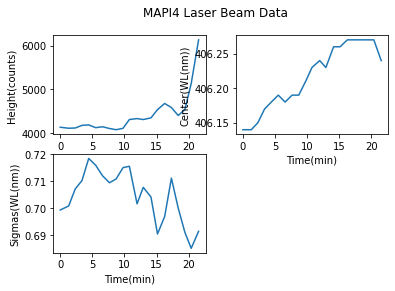

Wavelength Average: 406.21666666666664


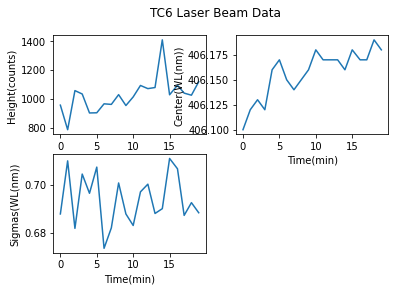

Wavelength Average: 406.157


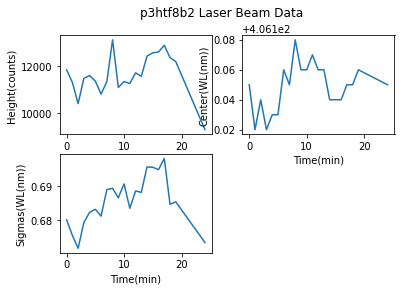

Wavelength Average: 406.1485714285714


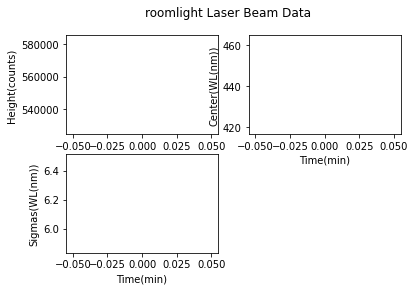

Wavelength Average: 440.72


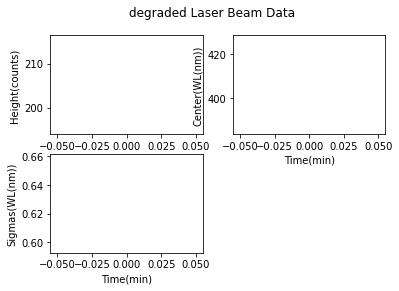

Wavelength Average: 406.15


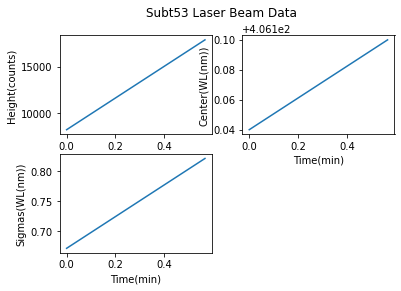

Wavelength Average: 406.16999999999996


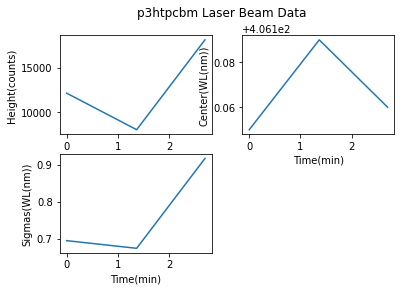

Wavelength Average: 406.1666666666667


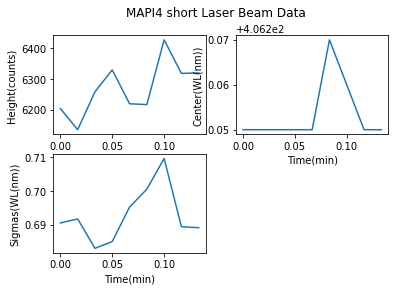

Wavelength Average: 406.25333333333333


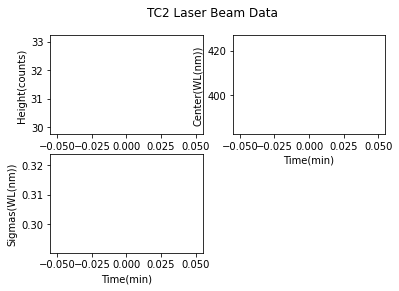

Wavelength Average: 404.58


In [ ]:
#Various transient bandwidth data

for name in spec_groups:
  heights = []
  centers = []
  sigmas = []
  times = []
  start_time = spec_groups[name][0].split()[1]
  for spec in spec_groups[name]:
    beam_fit(laser_data[spec])
    centers.append(laser_data[spec].center)
    heights.append(laser_data[spec].height)
    sigmas.append(laser_data[spec].sigma)
    times.append(float((pd.to_timedelta(str(Spec_data[spec].rec_time)) - pd.to_timedelta('0 days ' + start_time))/timedelta(minutes = 1)))
  plt.subplot(2,2,1)
  plt.plot(times, heights)
  plt.xlabel('Time(min)')
  plt.ylabel('Height(counts)')
  plt.subplot(2,2,2)
  plt.plot(times, centers)
  plt.xlabel('Time(min)')
  plt.ylabel('Center(WL(nm))')
  plt.subplot(2,2,3)
  plt.plot(times, sigmas)
  plt.xlabel('Time(min)')
  plt.ylabel('Sigmas(WL(nm))')
  plt.suptitle(name + " Laser Beam Data")
  plt.show()
  print('Wavelength Average: ' + str(statistics.mean(centers)))


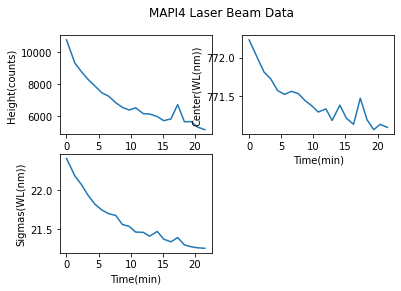

Wavelength Average: 771.4380952380952


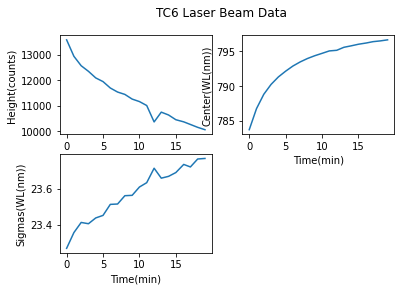

Wavelength Average: 793.261


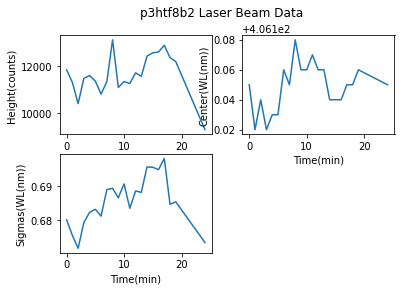

Wavelength Average: 406.1485714285714


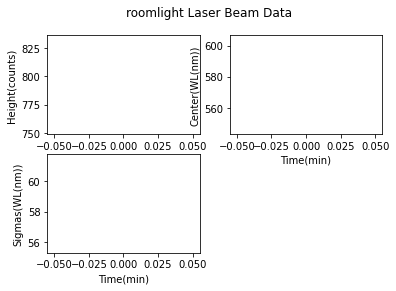

Wavelength Average: 574.91


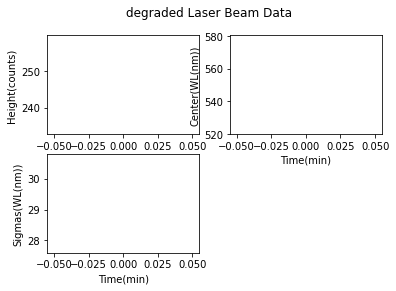

Wavelength Average: 550.11


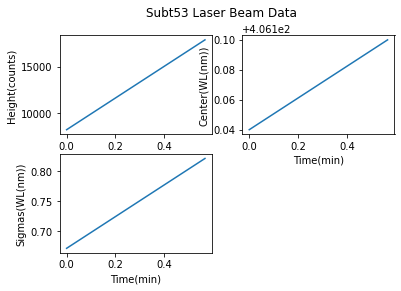

Wavelength Average: 406.16999999999996


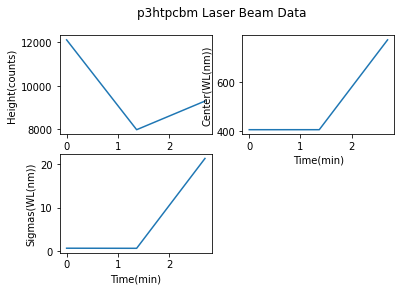

Wavelength Average: 529.0899999999999


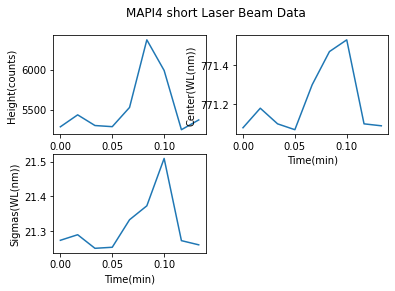

Wavelength Average: 771.2133333333334


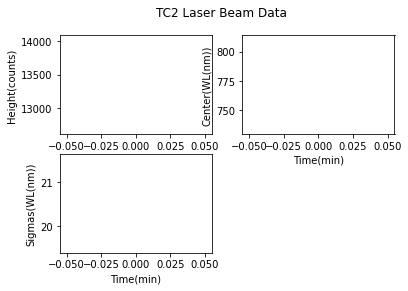

Wavelength Average: 771.66


In [ ]:
for name in spec_groups:
  heights = []
  centers = []
  sigmas = []
  times = []
  start_time = spec_groups[name][0].split()[1]
  for spec in spec_groups[name]:
    beam_fit(Spec_data[spec])
    centers.append(Spec_data[spec].center)
    heights.append(Spec_data[spec].height)
    sigmas.append(Spec_data[spec].sigma)
    times.append(float((pd.to_timedelta(str(Spec_data[spec].rec_time)) - pd.to_timedelta('0 days ' + start_time))/timedelta(minutes = 1)))
  plt.subplot(2,2,1)
  plt.plot(times, heights)
  plt.xlabel('Time(min)')
  plt.ylabel('Height(counts)')
  plt.subplot(2,2,2)
  plt.plot(times, centers)
  plt.xlabel('Time(min)')
  plt.ylabel('Center(WL(nm))')
  plt.subplot(2,2,3)
  plt.plot(times, sigmas)
  plt.xlabel('Time(min)')
  plt.ylabel('Sigmas(WL(nm))')
  plt.suptitle(name + " Laser Beam Data")
  plt.show()
  print('Wavelength Average: ' + str(statistics.mean(centers)))